In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
cancer = load_breast_cancer()
x = cancer.data 
y = cancer.target
cancer.feature_names
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

# PCA & finding best dimension

In [3]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.99) +1
print(dim)
print(cumsum)


2
[0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [4]:
pca = PCA(n_components= 2)
x_new = pca.fit_transform(x)


# StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(x_new)  #does not need to scale y in classification
x_scaled = scaler.transform(x_new)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3, random_state = 42)
x_train_scal, x_test_scal, y_train_scal, y_test_scal = train_test_split(x_scaled, y, test_size = 0.3, random_state = 42)

# LogisticRegression

In [8]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
y_pred_log_test = log_clf.predict(x_test)
y_pred_log_train = log_clf.predict(x_train)

print('accuracy im train set:',accuracy_score(y_pred_log_train, y_train))
print('accuracy in test set:',accuracy_score(y_pred_log_test, y_test))
print('confusion matrix \n',confusion_matrix(y_test, y_pred_log_test))
print('f1-score:', f1_score(y_test, y_pred_log_test))
print('recall score:', recall_score(y_test, y_pred_log_test))

accuracy im train set: 0.9120603015075377
accuracy in test set: 0.9766081871345029
confusion matrix 
 [[ 60   3]
 [  1 107]]
f1-score: 0.981651376146789
recall score: 0.9907407407407407


# LinearSVC

In [15]:
lin_svc_clf = LinearSVC()
lin_svc_clf.fit(x_train_scal, y_train_scal)
y_pred_svc_lin_test = lin_svc_clf.predict(x_test_scal)
y_pred_svc_lin_train = lin_svc_clf.predict(x_train_scal)

print('accuracy im train set:',accuracy_score(y_pred_svc_lin_train, y_train_scal))
print('accuracy in test set:',accuracy_score(y_pred_svc_lin_test, y_test_scal))
print('confusion matrix \n',confusion_matrix(y_test_scal, y_pred_svc_lin_test))
print('f1-score:', f1_score(y_test_scal, y_pred_svc_lin_test))
print('recall score:', recall_score(y_test_scal, y_pred_svc_lin_test))

accuracy im train set: 0.907035175879397
accuracy in test set: 0.9590643274853801
confusion matrix 
 [[ 57   6]
 [  1 107]]
f1-score: 0.9683257918552035
recall score: 0.9907407407407407


# SVC(kernel = 'linear')

In [14]:
svc_clf = SVC(kernel = 'linear')
svc_clf.fit(x_train_scal, y_train_scal)
y_pred_svc_test = svc_clf.predict(x_test_scal)
y_pred_svc_train = svc_clf.predict(x_train_scal)

print('accuracy im train set:',accuracy_score(y_pred_svc_train, y_train_scal))
print('accuracy in test set:',accuracy_score(y_pred_svc_test, y_test_scal))
print('confusion matrix \n',confusion_matrix(y_test_scal, y_pred_svc_test))
print('f1-score:', f1_score(y_test_scal, y_pred_svc_test))
print('recall score:', recall_score(y_test_scal, y_pred_svc_test))

accuracy im train set: 0.9120603015075377
accuracy in test set: 0.9532163742690059
confusion matrix 
 [[ 56   7]
 [  1 107]]
f1-score: 0.9639639639639639
recall score: 0.9907407407407407


# DecisionTreeClassifier

In [20]:
tree_clf = DecisionTreeClassifier(max_depth= 3)
tree_clf.fit(x_train, y_train)
y_pred_tree_test = tree_clf.predict(x_test)
y_pred_tree_train = tree_clf.predict(x_train)

print('accuracy im train set:',accuracy_score(y_pred_tree_train, y_train))
print('accuracy in test set:',accuracy_score(y_pred_tree_test, y_test))
print('confusion matrix \n',confusion_matrix(y_test, y_pred_tree_test))
print('f1-score:', f1_score(y_test, y_pred_tree_test))
print('recall score:', recall_score(y_test, y_pred_tree_test))

accuracy im train set: 0.9346733668341709
accuracy in test set: 0.9415204678362573
confusion matrix 
 [[ 54   9]
 [  1 107]]
f1-score: 0.9553571428571429
recall score: 0.9907407407407407


# RandomForestClassifier

In [19]:
raf_clf = RandomForestClassifier(max_depth=3, random_state = 42,n_jobs= -1)
raf_clf.fit(x_train_scal, y_train_scal)
y_pred_raf_test = raf_clf.predict(x_test_scal)
y_pred_raf_train = raf_clf.predict(x_train_scal)

print('accuracy im train set:',accuracy_score(y_pred_raf_train, y_train_scal))
print('accuracy in test set:',accuracy_score(y_pred_raf_test, y_test_scal))
print('confusion matrix \n',confusion_matrix(y_test_scal, y_pred_raf_test))
print('f1-score:', f1_score(y_test_scal, y_pred_raf_test))
print('recall score:', recall_score(y_test_scal, y_pred_raf_test))

accuracy im train set: 0.9221105527638191
accuracy in test set: 0.9590643274853801
confusion matrix 
 [[ 57   6]
 [  1 107]]
f1-score: 0.9683257918552035
recall score: 0.9907407407407407


# KNN algorithm with best neighbors

0.9532163742690059
number of neighbors with maximum accuracy is 0.9532163742690059 in index = 16 


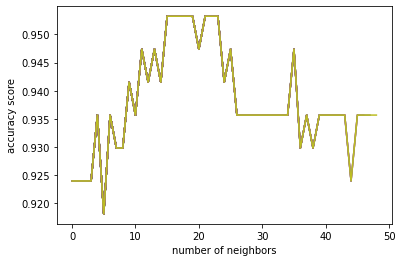

In [36]:
def best_n_neighbors():
    acc = []
    for i in range(1,50):
        neigh = KNeighborsClassifier(n_neighbors= i)
        neigh.fit(x_train_scal, y_train_scal)
        y_pred_neigh_test = neigh.predict(x_test_scal)
        y_pred_neigh_train = neigh.predict(x_train_scal)
        acc.append(accuracy_score(y_pred_neigh_test, y_test_scal))
        plt.plot(acc)
        plt.xlabel('number of neighbors')
        plt.ylabel('accuracy score')
    print(max(acc))
    print('number of neighbors with maximum accuracy is {} in index = {} '.format(max(acc),np.argmax(acc) + 1))
best_n_neighbors()    

In [35]:
neigh = KNeighborsClassifier(n_neighbors= 16)
neigh.fit(x_train_scal, y_train_scal)
y_pred_neigh_test = neigh.predict(x_test_scal)
y_pred_neigh_train = neigh.predict(x_train_scal)

print('accuracy im train set:',accuracy_score(y_pred_neigh_train, y_train_scal))
print('accuracy in test set:',accuracy_score(y_pred_neigh_test, y_test_scal))
print('confusion matrix \n',confusion_matrix(y_test_scal, y_pred_neigh_test))
print('f1-score:', f1_score(y_test_scal, y_pred_neigh_test))
print('recall score:', recall_score(y_test_scal, y_pred_neigh_test))


accuracy im train set: 0.9246231155778895
accuracy in test set: 0.9532163742690059
confusion matrix 
 [[ 55   8]
 [  0 108]]
f1-score: 0.9642857142857143
recall score: 1.0


# meshgrid

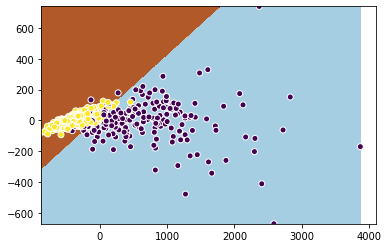

In [37]:
x0_min, x0_max = min(x_new[:,0]) - 0.5, max(x_new[:,0]) + 0.5
x1_min, x1_max = min(x_new[:,1]) - 0.5, max(x_new[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,2), np.arange(x1_min, x1_max,2))
z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)
plt.scatter(x_new[:,0], x_new[:,1], c = y, edgecolors='w')

# Classification of 6 algorithm

maximum recall is 0.9469026548672567 for random_forest.


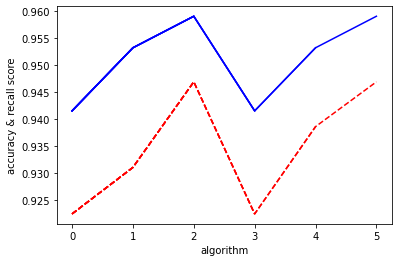

In [53]:
acc = []
recall = []
xlim = ['LogisticRegression', 'KNN', 'random_forest', 'Decision_tree', 'SVC_Kernel', 'lin_svc']
for clf in (log_clf, neigh, raf_clf, tree_clf, svc_clf, lin_svc_clf):
    clf.fit(x_train_scal, y_train_scal)
    y_pred = clf.predict(x_test_scal)
    acc.append(accuracy_score(y_pred, y_test_scal))
    recall.append(recall_score(y_pred, y_test_scal))
    plt.plot(recall,'r--')
    plt.plot(acc,'b')
    plt.ylabel('accuracy & recall score')
    plt.xlabel('algorithm')
    
print('maximum recall is {} for {}.'.format(max(recall),xlim[np.argmax(acc)]))


# Classification of 6 algorithm with cross validation

maximum recall is 0.9464285714285714 for lin_svc.
maximum accuracy is 0.953109243697479 for lin_svc.
[0.8916666666666667, 0.9152542372881356, 0.9380530973451328, 0.9363636363636364, 0.9067796610169492, 0.9464285714285714]
[0.9179831932773108, 0.9413445378151261, 0.9472268907563025, 0.929579831932773, 0.9297478991596637, 0.953109243697479]


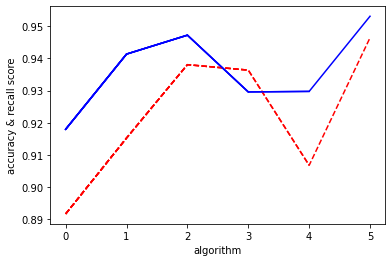

In [62]:
acc = []
recall = []
xlim = ['LogisticRegression', 'KNN', 'random_forest', 'Decision_tree', 'SVC_Kernel', 'lin_svc']
for clf in (log_clf, neigh, raf_clf, tree_clf, svc_clf, lin_svc_clf):
    clf.fit(x_train_scal, y_train_scal)
    y_pred = cross_val_predict(clf,x_test_scal, y_test_scal, cv = 5)
    
    acc.append(np.mean(cross_val_score(clf,x_test_scal, y_test_scal, scoring = 'accuracy', cv = 5)))
    recall.append(recall_score(y_pred, y_test_scal))
    
    plt.plot(recall,'r--')
    plt.plot(acc,'b')
    plt.ylabel('accuracy & recall score')
    plt.xlabel('algorithm')
    
print('maximum recall is {} for {}.'.format(max(recall),xlim[np.argmax(recall)]))
print('maximum accuracy is {} for {}.'.format(max(acc),xlim[np.argmax(acc)]))
print(recall)
print(acc)

# meshgrid for every algorithm of Classification

C:\Users\fatem\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


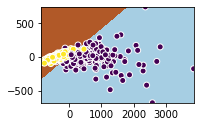

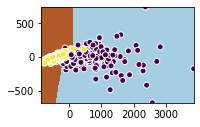

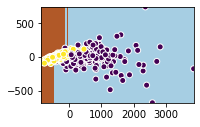

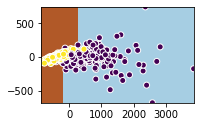

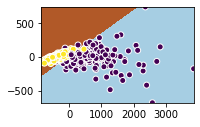

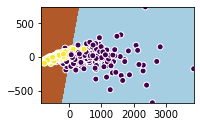

In [63]:
x0_min, x0_max = min(x_new[:,0]) - 0.5, max(x_new[:,0]) + 0.5
x1_min, x1_max = min(x_new[:,1]) - 0.5, max(x_new[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,1), np.arange(x1_min, x1_max,1))
i = 0
for clf in (log_clf, neigh, raf_clf, tree_clf, svc_clf, lin_svc_clf):
    clf.fit(x_train, y_train)
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape((xx.shape))
    plt.figure(figsize= (6,6))
    plt.subplot(320+ i)
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)
    plt.scatter(x_new[:,0], x_new[:,1], c = y, edgecolors='w')